Goal: predict iris from test set

1. load data
2. determine feature importance
3. fit 
4. train
5. predict 

[tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

[machine-learning-in-python-step-by-step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

In [15]:
import numpy as np
from sklearn import datasets
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [16]:
iris = datasets.load_iris()
def printRows():
    count = 0;
    for n in iris.data:
        count += 1
        if (count < 10):
            print(n)
        
printRows()        

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]


In [26]:
names_df = pd.read_csv('../albon/old_norwegiann_names.csv')
# names_df.head()
# len(names_df)
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [44]:
elves = []
count = 0

def get_weight(len):
    return len * 800

for index, row in iris_df.iterrows():
    if count < len(names_df):
        name = names_df.at[count, 'Name'] 
        gender = names_df.at[count, 'Gender']         
        elf = (name, gender, row['species'], row['sepal length (cm)'], get_weight(row['petal width (cm)']), row['sepal length (cm)'], row['sepal width (cm)'])
        elves.append(elf)
        count += 1           
    
elves_df = pd.DataFrame(elves, columns = ['Name', 'Gender', 'Species', 'Height', 'Weight', 'Strength', 'Stamina'])     
elves_df.head(20)
    
# 131 names with meanings 
# https://www.momjunction.com/baby-names/norwegian/#gref

,Name,Gender,Species,Height,Weight,Strength,Stamina
0,Emil,Boy,setosa,5.1,160.0,5.1,3.5
1,Emilie,Girl,setosa,4.9,160.0,4.9,3.0
2,Emma,Girl,setosa,4.7,160.0,4.7,3.2
3,Ingrid,Girl,setosa,4.6,160.0,4.6,3.1
4,Ísak,Boy,setosa,5.0,160.0,5.0,3.6
5,Jacob,Boy,setosa,5.4,320.0,5.4,3.9
6,Lucas,Boy,setosa,4.6,240.0,4.6,3.4
7,Maya,Girl,setosa,5.0,160.0,5.0,3.4
8,Noah,Unisex,setosa,4.4,160.0,4.4,2.9
9,Norah,Girl,setosa,4.9,80.0,4.9,3.1


In [22]:
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

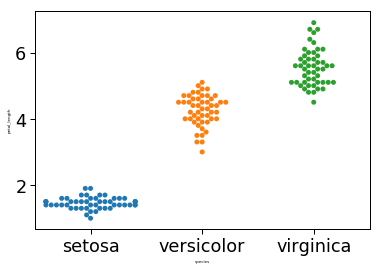

In [5]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set context to `"paper"`
sns.set_context("paper", font_scale=2, rc={"font.size":4,"axes.labelsize":4})

# Load iris data
iris = sns.load_dataset("iris")

# Construct iris plot
sns.swarmplot(x="species", y="petal_length", data=iris)

# Show plot
plt.show()

In [9]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.shape

(150, 5)

In [14]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

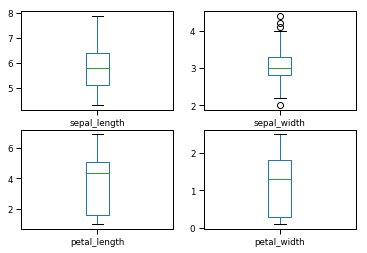

In [19]:
# box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

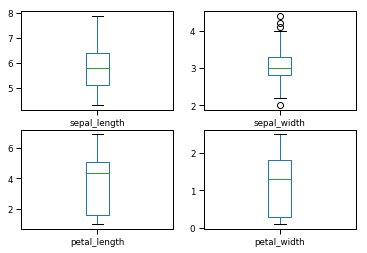

In [20]:
# box and whisker plots
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

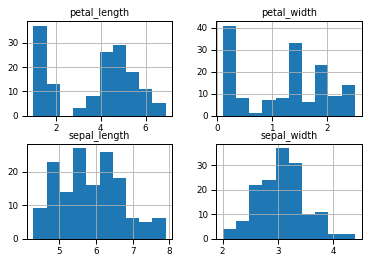

In [22]:
# histograms
iris.hist()
plt.show(

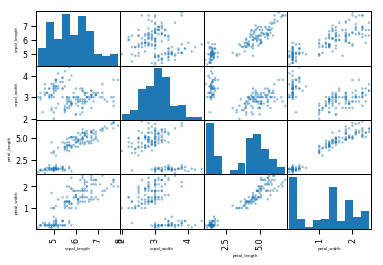

In [26]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(iris)
plt.show()

In [1]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Split-out validation dataset
array = iris.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
scoring = 'accuracy'



NameError: name 'iris' is not defined

In [31]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

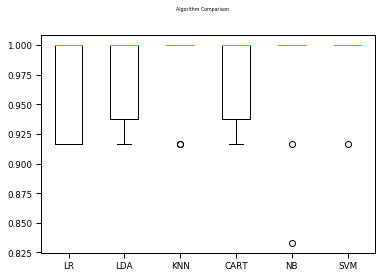

In [32]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [33]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

